In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import IMNN
import matplotlib.pyplot as plt

In [3]:
n_batches = 10
n_s = 10
n_d = 10

n_params = 2
n_summaries = 3

In [4]:
imnn = IMNN.IMNN(n_params, n_summaries, n_s, n_d)

Using single dataset


In [5]:
θ_fid = np.array([0., 1.])
δθ = np.array([0.1, 0.1])

In [6]:
seed = np.random.randint(1e6)
np.random.seed(seed)
simulations = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1]), (n_s * n_batches, 10))
np.random.seed(seed)
simulations_a_m = np.random.normal(θ_fid[0] - δθ[0], np.sqrt(θ_fid[1]), (n_d * n_batches, 1, 10)) 
np.random.seed(seed)
simulations_a_p = np.random.normal(θ_fid[0] + δθ[0], np.sqrt(θ_fid[1]), (n_d * n_batches, 1, 10)) 
np.random.seed(seed)
simulations_b_m = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] - δθ[1]), (n_d * n_batches, 1, 10)) 
np.random.seed(seed)
simulations_b_p = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] + δθ[1]), (n_d * n_batches, 1, 10)) 
numerical_derivative_simulations = np.concatenate([np.concatenate([simulations_a_m, simulations_b_m], axis=1)[:, np.newaxis, ...],
                                                   np.concatenate([simulations_a_p, simulations_b_p], axis=1)[:, np.newaxis, ...]],
                                                   axis=1)

In [7]:
seed = np.random.randint(1e6)
np.random.seed(seed)
test_simulations = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1]), (n_s, 10))
np.random.seed(seed)
test_simulations_a_m = np.random.normal(θ_fid[0] - δθ[0], np.sqrt(θ_fid[1]), (n_d, 1, 10)) 
np.random.seed(seed)
test_simulations_a_p = np.random.normal(θ_fid[0] + δθ[0], np.sqrt(θ_fid[1]), (n_d, 1, 10)) 
np.random.seed(seed)
test_simulations_b_m = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] - δθ[1]), (n_d, 1, 10)) 
np.random.seed(seed)
test_simulations_b_p = np.random.normal(θ_fid[0], np.sqrt(θ_fid[1] + δθ[1]), (n_d, 1, 10)) 
numerical_derivative_test_simulations = np.concatenate([np.concatenate([test_simulations_a_m, test_simulations_b_m], axis=1)[:, np.newaxis, ...],
                                                        np.concatenate([test_simulations_a_p, test_simulations_b_p], axis=1)[:, np.newaxis, ...]],
                                                       axis=1)

In [8]:
imnn.setup_dataset(θ_fid, simulations, numerical_derivative_simulations, δθ=δθ)
imnn.setup_dataset(θ_fid, test_simulations, numerical_derivative_test_simulations, δθ=δθ, train=False)

In [9]:
model = tf.keras.Sequential(
    [tf.keras.Input(shape=(10,)),
     tf.keras.layers.Dense(128),
     tf.keras.layers.Activation("tanh"),
     tf.keras.layers.Dense(128),
     tf.keras.layers.Activation("tanh"),
     tf.keras.layers.Dense(n_summaries),
     tf.keras.layers.Activation("tanh")
    ])
opt = tf.keras.optimizers.Adam()

In [10]:
imnn.set_model(model, opt)

Checking is not currently done on the model. Make sure that its output has shape (None, 3) for the fiducial values and (None, 2, 2, 3) for the derivative values.


In [11]:
imnn.set_regularisation_strength(0.1, 10.)

In [12]:
imnn.fit(10, validate=True)

W1120 13:12:39.321064 4713074112 base_layer.py:1814] Layer dense is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Calculate jacobian
Get covariance
Get derivative of mean
Calculate Fisher
Calculate loss
Calculate regulariser
Build gradients
Apply gradients
Return diagnostics
Calculate jacobian
Get covariance
Get derivative of mean
Calculate Fisher
Calculate loss
Calculate regulariser
Build gradients
Apply gradients
Return diagnostics



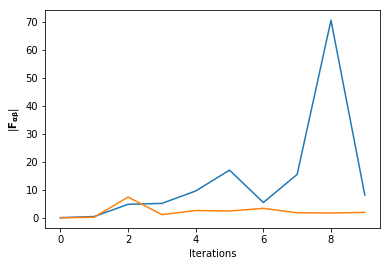

In [13]:
plt.plot(imnn.history["det_F"])
plt.plot(imnn.history["val_det_F"])
plt.xlabel("Iterations")
plt.ylabel(r"$|{\bf F_{\alpha\beta}}|$");

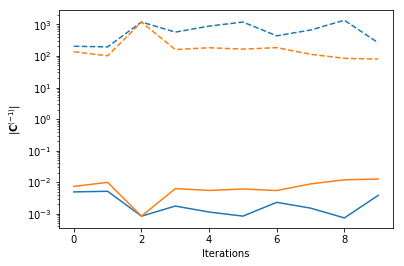

In [14]:
plt.plot(imnn.history["det_C"], color="C0")
plt.plot(imnn.history["det_Cinv"], color="C0", linestyle="dashed")
plt.plot(imnn.history["val_det_C"], color="C1")
plt.plot(imnn.history["val_det_Cinv"], color="C1", linestyle="dashed")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel(r"$|{\bf C}^{(-1)}|$");

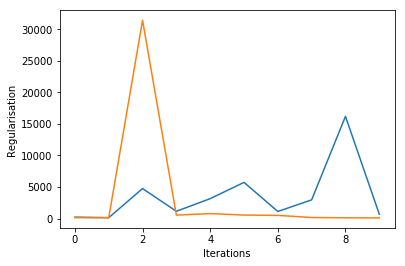

In [15]:
plt.plot(imnn.history["reg"])
plt.plot(imnn.history["val_reg"])
plt.xlabel("Iterations")
plt.ylabel(r"Regularisation");

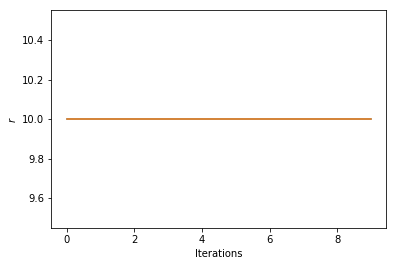

In [16]:
plt.plot(imnn.history["r"])
plt.plot(imnn.history["val_r"])
plt.xlabel("Iterations")
plt.ylabel(r"$r$");